In [2]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import h5py
import csv
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import csv
import seaborn as sns
import pandas as pd 
from pandas import Series, DataFrame 
from functions import *
import time
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from itertools import islice, cycle

In [3]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

In [4]:

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu',
                 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0',
                 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster',
                 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2',
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3',
                 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2',
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',
                 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG',
                 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG',
                 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0',
                 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3',
                 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core',
                 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG',
                 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset',
                 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection',
                 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1',
                 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3',
                 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_variables]
y = train['Truth']


print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)
Shape of X: (162500, 160)
Shape of y: (162500,)


## Choosing the 5 most important variables, albeit for the LightGBM model, to see if they can provide us with good parameters for the unsupervised learning

In [5]:
five_best_features = ['p_dPOverP', 'p_d0Sig', 'p_sigmad0', 'p_deltaPhiRescaled2', 'p_ptconecoreTrackPtrCorrection']

X_trimmed = X[five_best_features]

## Setting up parameters for the K-means algorithm

The amount of classes that have selected electrons are:  23  out of 24
The amount of classes that have selected non-electrons are:  18  out of 24


/tmp/ipykernel_18394/1223402764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trimmed_electron['Class'] = electron_clusters
/tmp/ipykernel_18394/1223402764.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trimmed_non_electron['Class'] = non_electron_clusters


<Axes: xlabel='p_dPOverP', ylabel='p_d0Sig'>

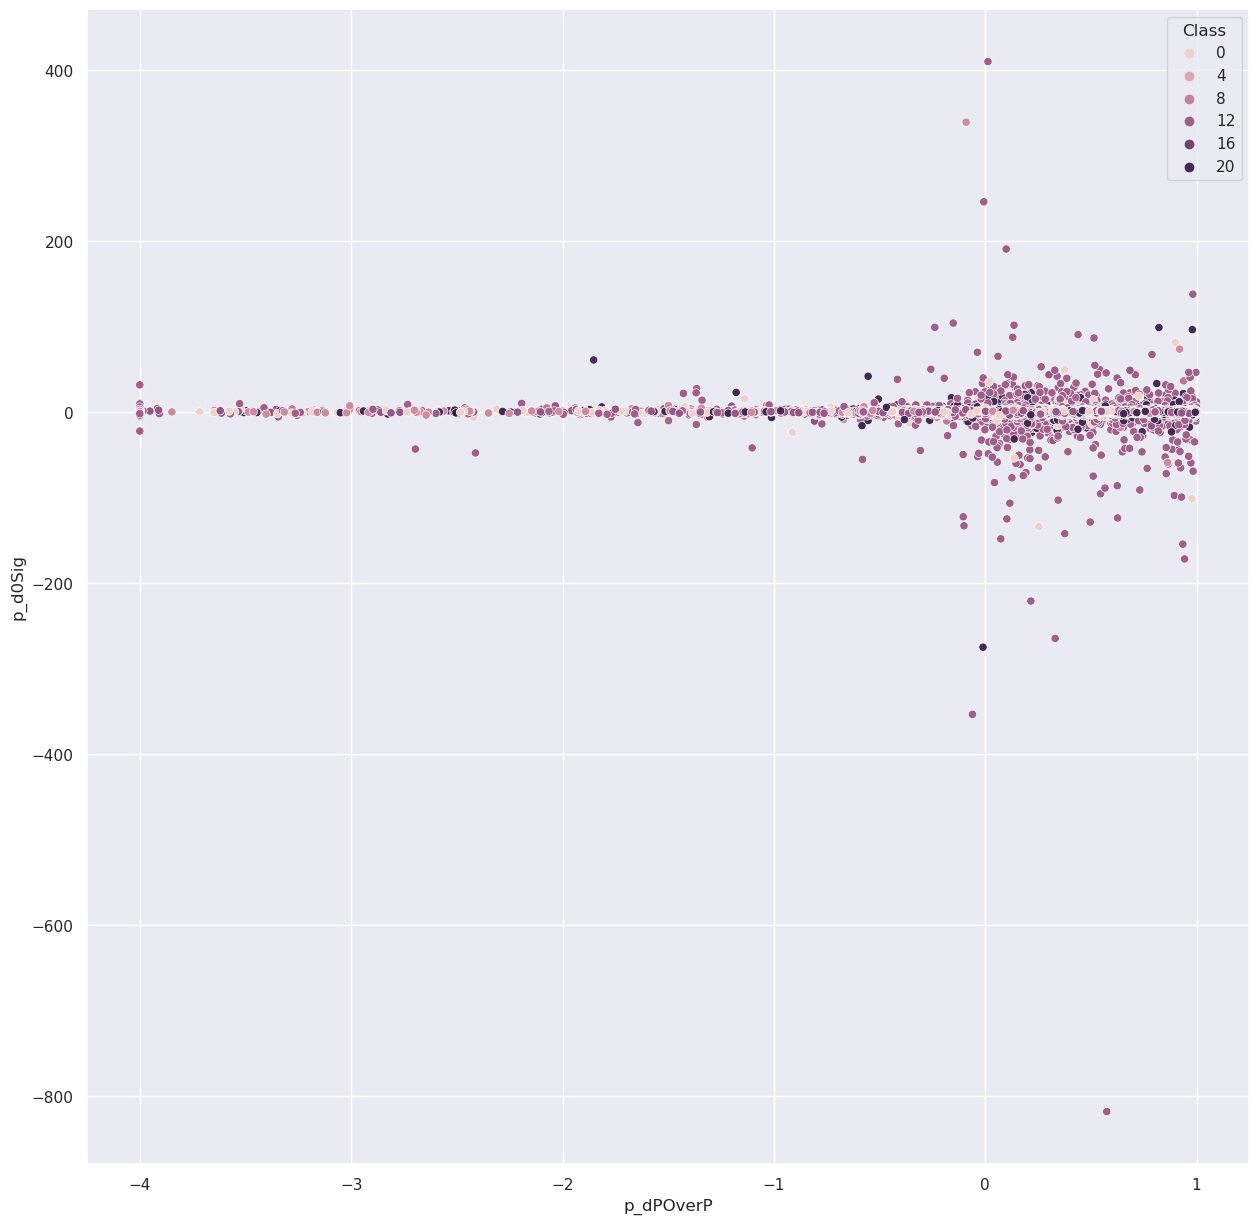

In [11]:
clusters = 24
random_state = 0
init = 'auto'

kmeans = KMeans(n_clusters = clusters, random_state = random_state, n_init = init).fit(X_trimmed)

X_trimmed_electron = X_trimmed[train['Truth'] == 1]

X_trimmed_non_electron = X_trimmed[train['Truth'] != 1]

electron_index = np.where(y==1)[0]

electron_clusters = kmeans.labels_[electron_index]

electron_clusters_class = np.unique(electron_clusters)

non_electron_index = np.where(y==0)[0]

non_electron_clusters = kmeans.labels_[non_electron_index]

non_electron_clusters_class = np.unique(non_electron_clusters)

print(f'The amount of classes that have selected electrons are: ', len(electron_clusters_class), f' out of {clusters}')
print(f'The amount of classes that have selected non-electrons are: ', len(non_electron_clusters_class), f' out of {clusters}')

X_trimmed_electron['Class'] = electron_clusters
X_trimmed_non_electron['Class'] = non_electron_clusters

colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(electron_clusters_class) + 1),
                )
            )
        )
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])


sns.set(rc={"figure.figsize":(10, 10)})


sns.scatterplot(data=X_trimmed_electron, x=five_best_features[0], y=five_best_features[1], hue='Class')

<Axes: xlabel='p_d0Sig', ylabel='p_sigmad0'>

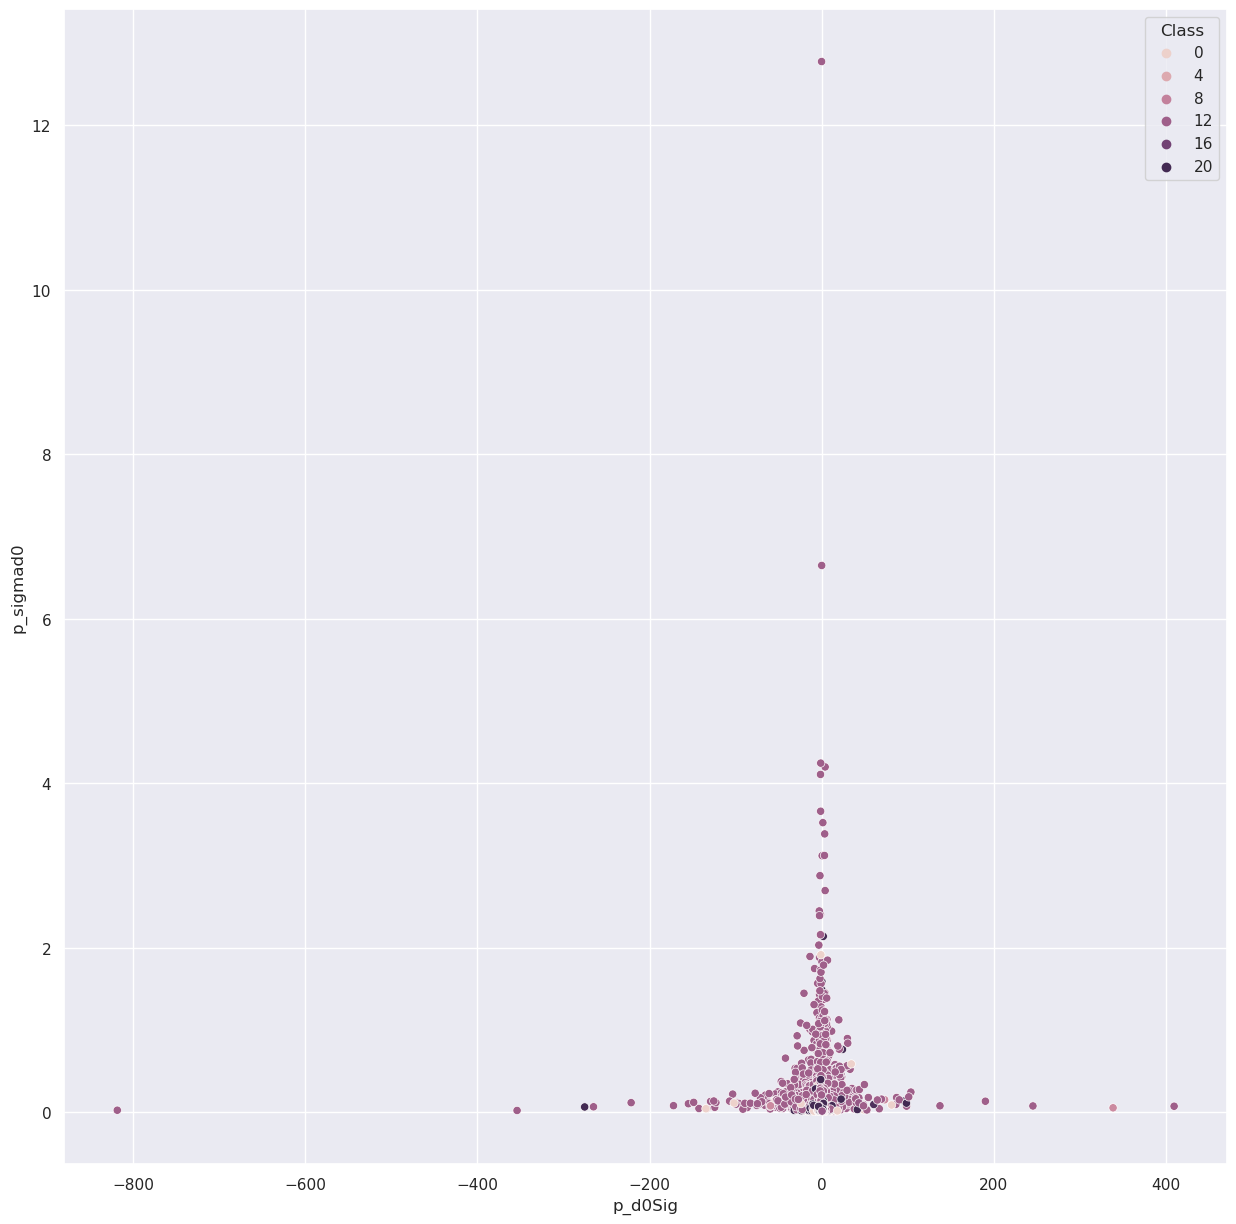

In [7]:
sns.scatterplot(data=X_trimmed_electron, x=five_best_features[1], y=five_best_features[2], hue='Class')

<Axes: xlabel='p_sigmad0', ylabel='p_deltaPhiRescaled2'>

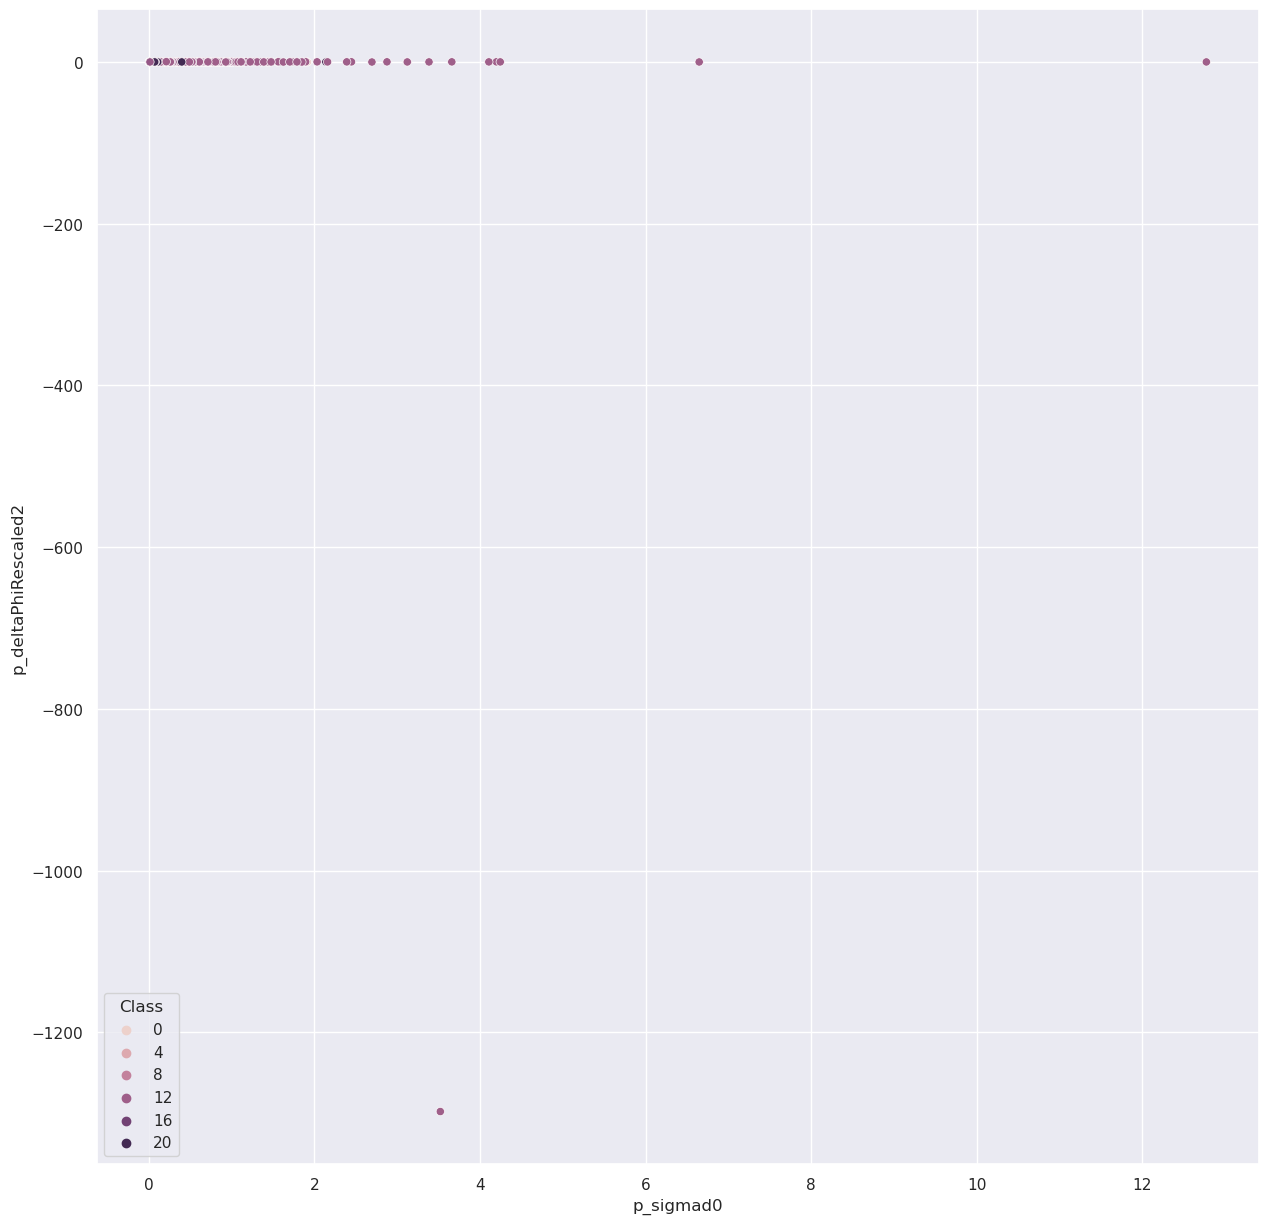

In [8]:
sns.scatterplot(data=X_trimmed_electron, x=five_best_features[2], y=five_best_features[3], hue='Class')

<Axes: xlabel='p_deltaPhiRescaled2', ylabel='p_ptconecoreTrackPtrCorrection'>

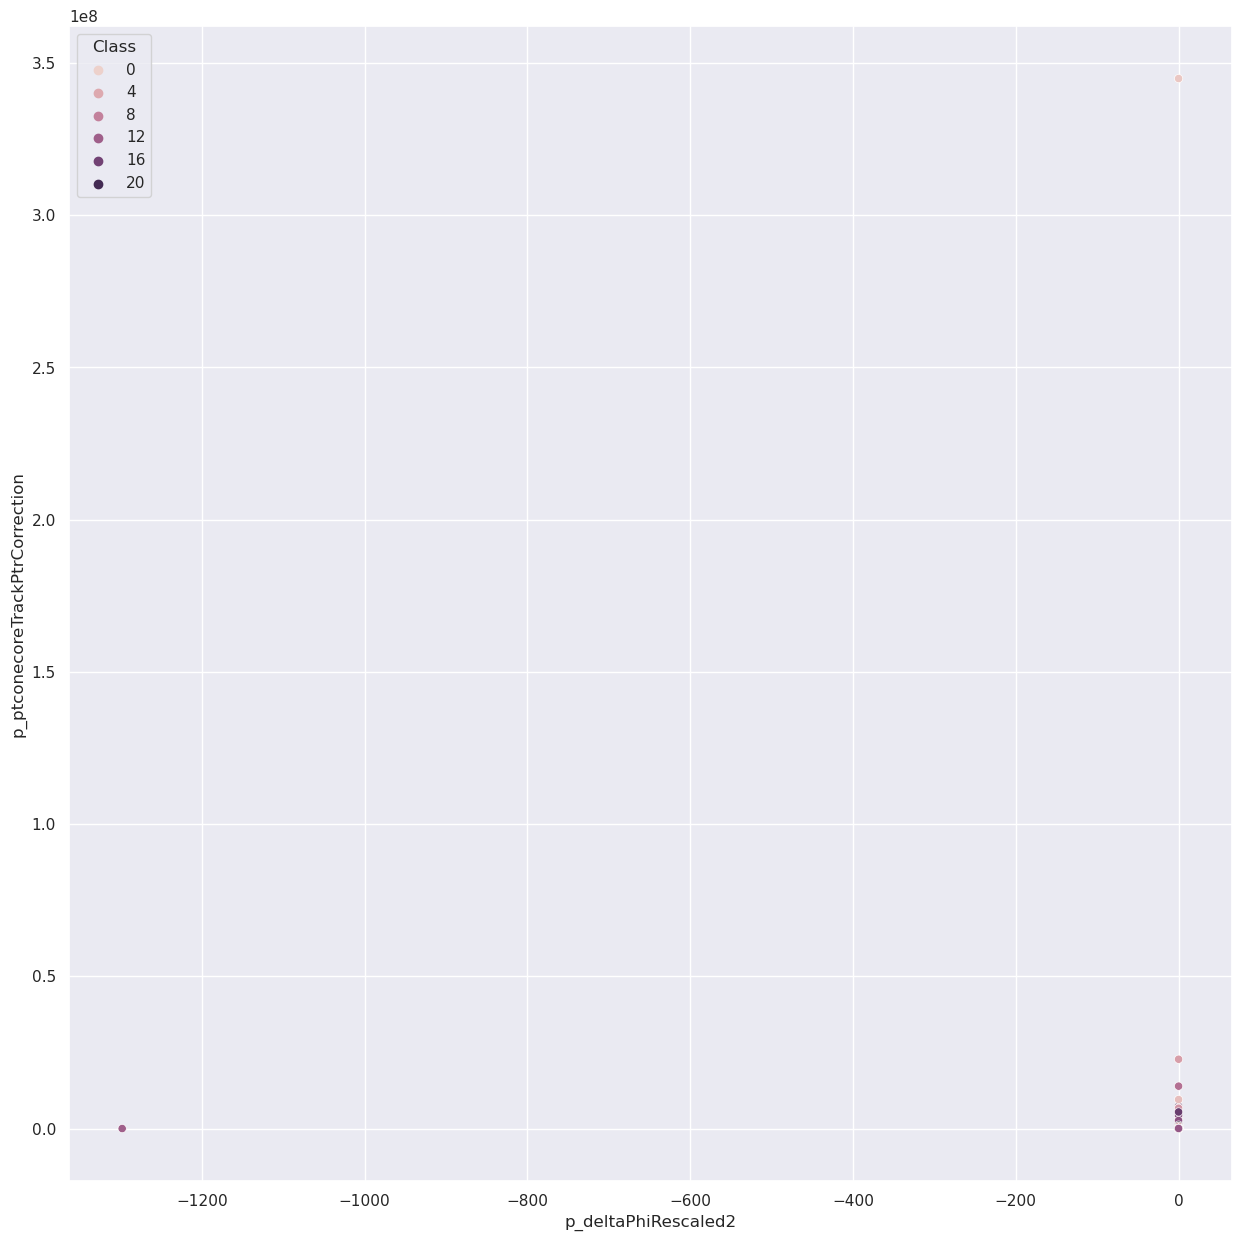

In [9]:
sns.scatterplot(data=X_trimmed_electron, x=five_best_features[3], y=five_best_features[4], hue='Class')

In [10]:
# import time
# import warnings
# from tqdm.notebook import tqdm, trange    # Progress bar.

# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn import cluster, datasets, mixture
# from sklearn.neighbors import kneighbors_graph
# from sklearn.preprocessing import StandardScaler
# from itertools import cycle, islice

# np.random.seed(0)

# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 1500
# noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
# noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# no_structure = np.random.rand(n_samples, 2), None

# # Anisotropicly distributed data
# random_state = 170
# X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
# transformation = [[0.6, -0.6], [-0.4, 0.8]]
# X_aniso = np.dot(X, transformation)
# aniso = (X_aniso, y)

# # blobs with varied variances
# varied = datasets.make_blobs(
#     n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
# )

# # ============
# # Set up cluster parameters
# # ============
# plt.figure(figsize=(9 * 2 + 3, 13))
# plt.subplots_adjust(
#     left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
# )

# plot_num = 1

# default_base = {
#     "quantile": 0.3,
#     "eps": 0.3,
#     "damping": 0.9,
#     "preference": -200,
#     "n_neighbors": 10,
#     "n_clusters": 3,
#     "min_samples": 20,
#     "xi": 0.05,
#     "min_cluster_size": 0.1,
# }

# datasets = [
#     (
#         noisy_circles,
#         {
#             "damping": 0.77,
#             "preference": -240,
#             "quantile": 0.2,
#             "n_clusters": 2,
#             "min_samples": 20,
#             "xi": 0.25,
#         },
#     ),
#     (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
#     (
#         varied,
#         {
#             "eps": 0.18,
#             "n_neighbors": 2,
#             "min_samples": 5,
#             "xi": 0.035,
#             "min_cluster_size": 0.2,
#         },
#     ),
#     (
#         aniso,
#         {
#             "eps": 0.15,
#             "n_neighbors": 2,
#             "min_samples": 20,
#             "xi": 0.1,
#             "min_cluster_size": 0.2,
#         },
#     ),
#     (blobs, {}),
#     (no_structure, {}),
# ]


# for i_dataset, (dataset, algo_params) in enumerate(tqdm(datasets)):
#     # update parameters with dataset-specific values
#     params = default_base.copy()
#     params.update(algo_params)

#     X, y = dataset

#     # normalize dataset for easier parameter selection
#     X = StandardScaler().fit_transform(X)

#     # estimate bandwidth for mean shift
#     bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

#     # connectivity matrix for structured Ward
#     connectivity = kneighbors_graph(
#         X, n_neighbors=params["n_neighbors"], include_self=False
#     )
#     # make connectivity symmetric
#     connectivity = 0.5 * (connectivity + connectivity.T)

#     # ============
#     # Create cluster objects
#     # ============
#     ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#     two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
#     ward = cluster.AgglomerativeClustering(
#         n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
#     )
#     spectral = cluster.SpectralClustering(
#         n_clusters=params["n_clusters"],
#         eigen_solver="arpack",
#         affinity="nearest_neighbors",
#     )
#     dbscan = cluster.DBSCAN(eps=params["eps"])
#     optics = cluster.OPTICS(
#         min_samples=params["min_samples"],
#         xi=params["xi"],
#         min_cluster_size=params["min_cluster_size"],
#     )
#     affinity_propagation = cluster.AffinityPropagation(
#         damping=params["damping"], preference=params["preference"],
#     )
#     average_linkage = cluster.AgglomerativeClustering(
#         linkage="average",
#         affinity="cityblock",
#         n_clusters=params["n_clusters"],
#         connectivity=connectivity,
#     )
#     birch = cluster.Birch(n_clusters=params["n_clusters"])
#     gmm = mixture.GaussianMixture(
#         n_components=params["n_clusters"], covariance_type="full"
#     )

#     clustering_algorithms = (
#         ("MiniBatch\nKMeans", two_means),
#         ("Affinity\nPropagation", affinity_propagation),
#         ("MeanShift", ms),
#         ("Spectral\nClustering", spectral),
#         ("Ward", ward),
#         ("Agglomerative\nClustering", average_linkage),
#         ("DBSCAN", dbscan),
#         ("OPTICS", optics),
#         ("BIRCH", birch),
#         ("Gaussian\nMixture", gmm),
#     )

#     for name, algorithm in clustering_algorithms:
#         t0 = time.time()

#         # catch warnings related to kneighbors_graph
#         with warnings.catch_warnings():
#             warnings.filterwarnings(
#                 "ignore",
#                 message="the number of connected components of the "
#                 + "connectivity matrix is [0-9]{1,2}"
#                 + " > 1. Completing it to avoid stopping the tree early.",
#                 category=UserWarning,
#             )
#             warnings.filterwarnings(
#                 "ignore",
#                 message="Graph is not fully connected, spectral embedding"
#                 + " may not work as expected.",
#                 category=UserWarning,
#             )
#             algorithm.fit(X)

#         t1 = time.time()
#         if hasattr(algorithm, "labels_"):
#             y_pred = algorithm.labels_.astype(int)
#         else:
#             y_pred = algorithm.predict(X)

#         plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
#         if i_dataset == 0:
#             plt.title(name, size=18)

#         colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(y_pred) + 1),
#                 )
#             )
#         )
#         # add black color for outliers (if any)
#         colors = np.append(colors, ["#000000"])
#         plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
#         plt.xticks(())
#         plt.yticks(())
#         plt.text(
#             0.99,
#             0.01,
#             ("%.2fs" % (t1 - t0)).lstrip("0"),
#             transform=plt.gca().transAxes,
#             size=15,
#             horizontalalignment="right",
#         )
#         plot_num += 1

# plt.show()